<a href="https://colab.research.google.com/github/Arshad221b/Automatic-Music-Transcription/blob/master/AMTpreproocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
!pwd

/content


In [0]:
!cd ../

In [0]:
!cd /bin

In [11]:
!apt install fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2
!pip install midi2audio


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth1 libqt5x11extras5 qsynth
Suggested packages:
  fluid-soundfont-gs timidity jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth1 libqt5x11extras5 qsynth
0 upgraded, 5 newly installed, 0 to remove and 7 not upgraded.
Need to get 120 MB of archives.
After this operation, 150 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libfluidsynth1 amd64 1.1.9-1 [137 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluidsynth amd64 1.1.9-1 [20.7 kB]
Get:4 http://archive.ubu

In [20]:
import sys
from os import listdir
from os.path import join, isfile
from subprocess import call
from scipy import signal
from scipy.io import wavfile

import os


path   = '/bin/dataMIDI'
path2  = '/bin/dataWAV'
path3  = '/bin/dataSPEC'

files  = os.listdir(path)
files2 = os.listdir(path2)
files3 = os.listdir(path3)

def wav_to_spectrogram(wav_file, output, segment=None):
  x, sr = librosa.load(wav_file)
  bins_per_octave = 36
  cqt = librosa.cqt(x, sr=sr, n_bins=300, bins_per_octave=bins_per_octave)
  plt.plot(cqt)

def midi_to_wav(midi_file, output):

  command = ['fluidsynth', '-ni' ,'font.sf2' ,midi_file, '-F', output, '-r' ,'44100']
  return call(command)

midis =  [x for x in files  if x.endswith('.mid')]
wavs  =  [x for x in files2 if x.endswith('.wav')]
specs =  [x for x in files3 if x.endswith('.jpg')]

count = 1
for midi in midis:
    print(midi)
    name = midi[:-4]
    if name + '.wav' not in wavs:
       midi_to_wav(join(path, midi), join(path2, name + '.wav'))
print('DONE!')


song107.mid
song154.mid
song137 (1).mid
song103 (1).mid
song168.mid
song71.mid
song30.mid
song137.mid
song156.mid
song112.mid
song58.mid
song11.mid
song125.mid
song60.mid
song172.mid
song96.mid
song150.mid
song13.mid
song98.mid
song122.mid
song135.mid
song164.mid
song132.mid
song28.mid
song123 (1).mid
song165.mid
song111.mid
song141.mid
song128.mid
song42.mid
song2.mid
song145.mid
song140.mid
song148.mid
song163.mid
song10.mid
song171.mid
song84.mid
song5.mid
song68 (1).mid
song178.mid
song54.mid
song15.mid
song7.mid
song19.mid
song158.mid
song152.mid
song101.mid
song35.mid
song17.mid
song74.mid
song9.mid
song50.mid
song116.mid
song29.mid
song173.mid
song51.mid
song45.mid
song73.mid
song127.mid
song38.mid
song109.mid
song72.mid
song24.mid
song139.mid
song138.mid
song75.mid
song123.mid
song135 (1).mid
song57.mid
song31.mid
song20.mid
song55.mid
song83.mid
song100.mid
song22.mid
song143.mid
song76.mid
song18.mid
song60 (1).mid
song87.mid
song114.mid
song69.mid
song108.mid
song102.mid
son

"\n    if name + '.jpg' not in specs:\n      wav_to_spectrogram(join(wav_dir, name + '.wav'), join(spec_dir, name + '.jpg'))\n    print('Done!')\n\n    if name + '.wav' not in wavs:\n       midi_to_wav(join(path, midi), join(path2, name + '.wav'))\n    count = count + 1\n    if name + '.jpg' not in specs:\n       wav_to_spectrogram(join(path2, name + '.wav'), join(path3, name + '.jpg'))\n       "

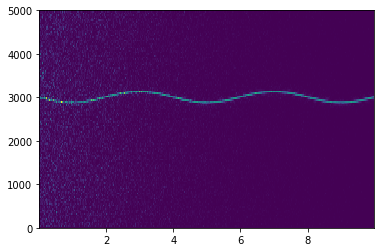

In [55]:
import numpy as np
from scipy import signal
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
%matplotlib inline

fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500 * np.cos(2 * np.pi * 0.25 * time)
carrier = amp * np.sin(2 * np.pi * 3e3 * time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time / 5)
x = carrier + noise

f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)

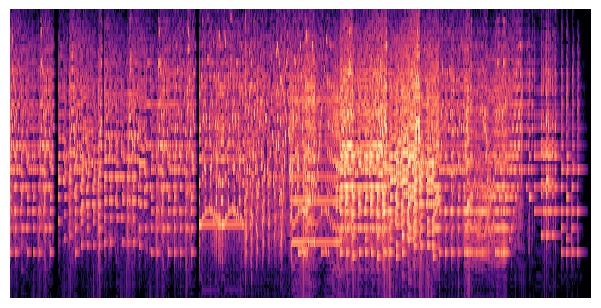

In [57]:
from IPython.display import Image
Image('/bin/dataSPEC/song0.jpg')